## 1. Import the libraries

In [1]:
import pandas as pd
import numpy as np

## 2. Import dataset

In [2]:
df = pd.read_csv(r"salary.csv")

## 3. Summarize the dataset

In [3]:
df.shape

(32561, 5)

In [4]:
df.head(5)

,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,<=50K
1,82,9,0,18,<=50K
2,66,10,0,40,<=50K
3,54,4,0,40,<=50K
4,41,10,0,40,<=50K


## 4. Mapping Salary value to Binary values

In [5]:
income_set = set(df['income'])
df['income'] = df['income'].map({'<=50K':0,'>50K':1}).astype(int)

In [6]:
df.head(10)

,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,0
1,82,9,0,18,0
2,66,10,0,40,0
3,54,4,0,40,0
4,41,10,0,40,0
5,34,9,0,45,0
6,38,6,0,40,0
7,74,16,0,20,1
8,68,9,0,40,0
9,41,10,0,60,1


## 5. Segregate dataset into X(independent) & Y(dependent)

In [7]:
X = df.iloc[:,:-1].values

In [8]:
Y = df.iloc[:,-1].values

In [9]:
X

array([[90,  9,  0, 40],
       [82,  9,  0, 18],
       [66, 10,  0, 40],
       ...,
       [40,  9,  0, 40],
       [58,  9,  0, 40],
       [22,  9,  0, 20]], dtype=int64)

In [10]:
Y

array([0, 0, 0, ..., 1, 0, 0])

## 6. Splitting dataset into train and test dataset

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

## 7. Feature Scaling
We scale our data to make all the features contribute equally to thre result.

fit_transform

transform

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## 8. Finding the best K_value

Text(0, 0.5, 'Mean Error')

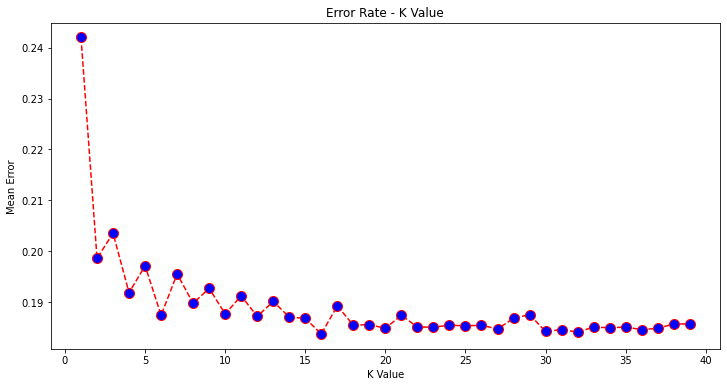

In [13]:
error = []
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# calculating error for K Values between 1 and 40
for i in range(1,40):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    pred_i = model.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(12,6))
plt.plot(range(1,40),error, color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title("Error Rate - K Value")
plt.xlabel("K Value")
plt.ylabel("Mean Error")

## 9. Training the dataset

In [14]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=16, metric='minkowski',p=2)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=16)

## 10. Predicting whether Salary will be above 50K or not

In [15]:
age = int(input("Enter New Employee's Age: "))
education = int(input("Enter New Employee's Education"))
capitalGain = int(input("Enter New Employee's Capital Gain: "))
hrs = int(input("Enter New Employee's Hour's Per Week: "))
newEmp = [[age,education,capitalGain,hrs]]
result = model.predict(sc.transform(newEmp))
print(result)

if result ==1:
    print("Employee might got Salary above 50K")
else:
    print("Employee might not got Salary above 50K")

Enter New Employee's Age: 20
Enter New Employee's Education15
Enter New Employee's Capital Gain: 0
Enter New Employee's Hour's Per Week: 25
[0]
Employee might not got Salary above 50K


## 11. Prediction for all test data

In [16]:
y_pred = model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


## 12. Evaluating model - CONFUSION MATRIX

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)

print("Confusion Matrix")
print(cm)

print("Accuracy of the Model: {0}%".format(accuracy_score(y_test,y_pred)*100))

Confusion Matrix
[[5882  311]
 [1185  763]]
Accuracy of the Model: 81.62387913032796%
